In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import ipywidgets as widgets

def get_config():
    with open("config.yml", "r") as my_config:
        config = yaml.safe_load(my_config)
    return config
config = get_config()

df_before_plaque = pd.read_csv(config['plaque'])
df_after_plaque = pd.read_csv(config['plaque'])

# Specified colors (corrected hex codes)
colors = ['#FE7F2D', '#619B8A', '#FCCA46', '#A1C181', '#233D4D']

In [4]:
# Cleanup and preparation
df_before_plaque_cleaned = df_before_plaque.dropna()
df_after_plaque_cleaned = df_after_plaque.dropna()

df_before_plaque_sorted = df_before_plaque_cleaned.sort_values(by='Weeks')
df_after_plaque_sorted = df_after_plaque_cleaned.sort_values(by='Weeks')

weeks_before = df_before_plaque_sorted['Weeks']
weeks_after = df_after_plaque_sorted['Weeks']

participants = df_before_plaque_sorted.columns[1:].tolist()

# Function to plot data for selected participant
def plot_data(participant):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    if participant in df_before_plaque_sorted.columns:
        axes[0].plot(weeks_before, df_before_plaque_sorted[participant], marker='o', label='Before probiotics', color='blue')
        axes[0].set_title(f'{participant} - Before probiotics')
        axes[0].set_xlabel('Weeks')
        axes[0].set_ylabel('Amount of tooth with plaque')
        axes[0].legend()
        
    if participant in df_after_plaque_sorted.columns:
        axes[1].plot(weeks_after, df_after_plaque_sorted[participant], marker='o', label='After probiotics', color='green')
        axes[1].set_title(f'{participant} - After probiotics')
        axes[1].set_xlabel('Weeks')
        axes[1].legend()
    
    plt.tight_layout()
    plt.show()

# Create a Dropdown widget for participants
participant_selector = widgets.Dropdown(
    options=participants,
    value=participants[0],
    description='Participant:',
)

# Widget interaction
widgets.interactive(plot_data, participant=participant_selector)

interactive(children=(Dropdown(description='Participant:', options=('Participant 1', 'Participant 2', 'Partici…

In [28]:
import panel as pn
pn.extension()

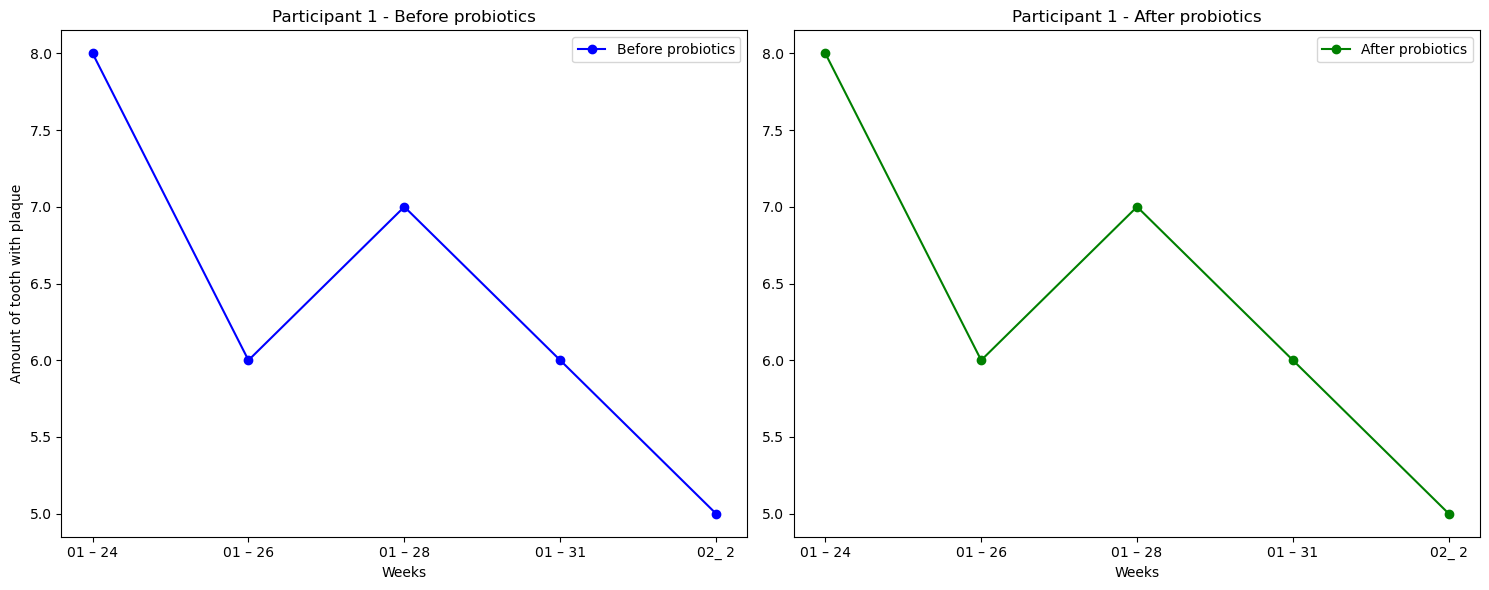

BokehModel(combine_events=True, render_bundle={'docs_json': {'f7cff22d-0506-4c52-9ed8-0dcd8e555526': {'defs': …

Row
    [0] WidgetBox
        [0] Select(name='participants', options=['Participant 1', ...], value='Participant 1')
    [1] ParamFunction(function)

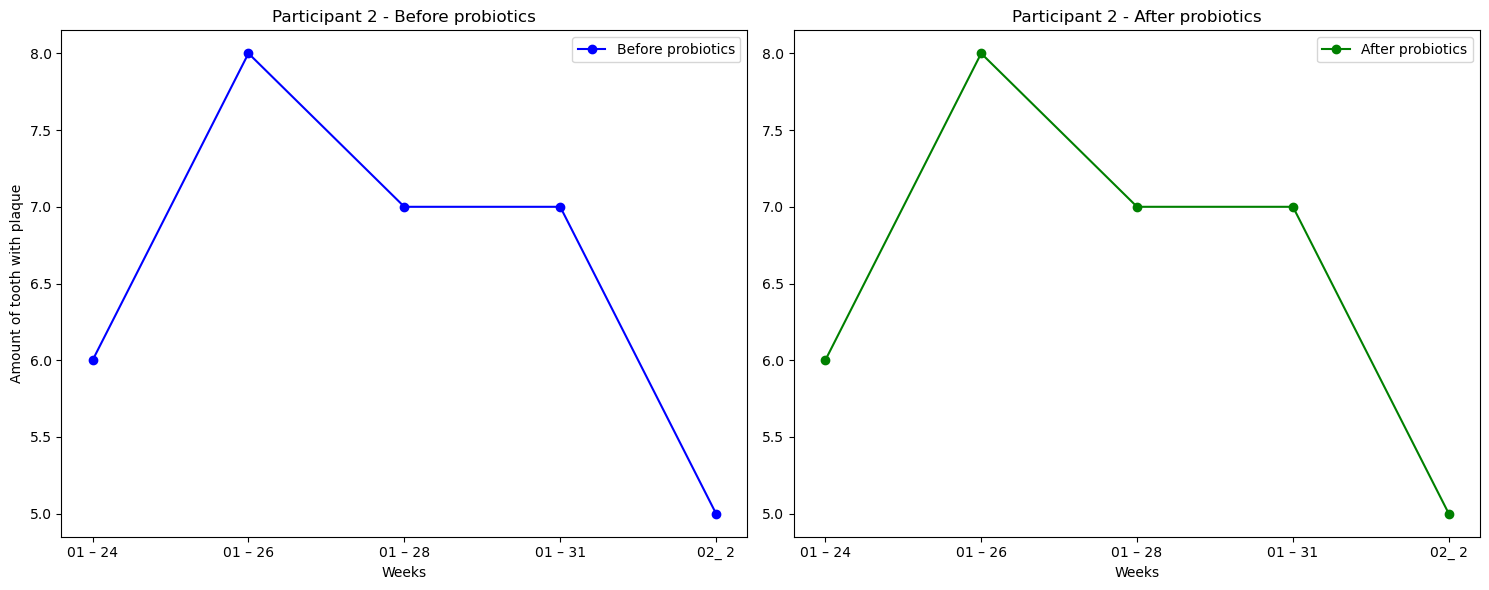

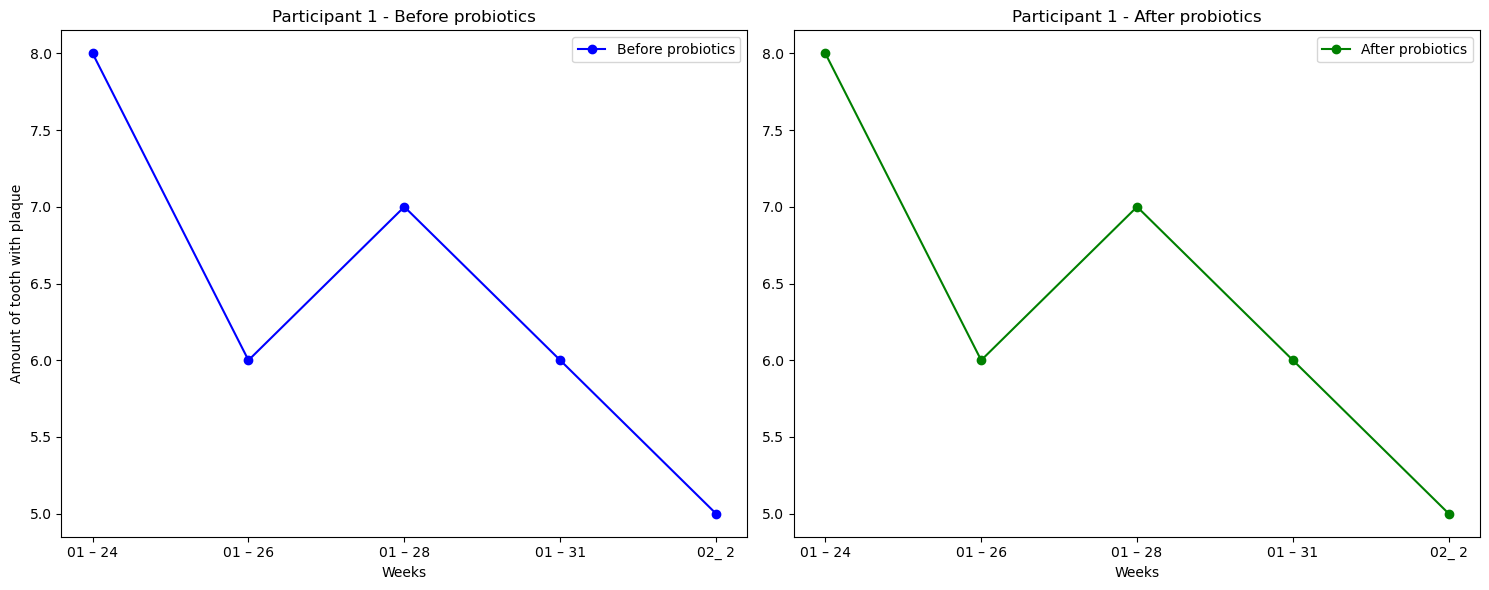

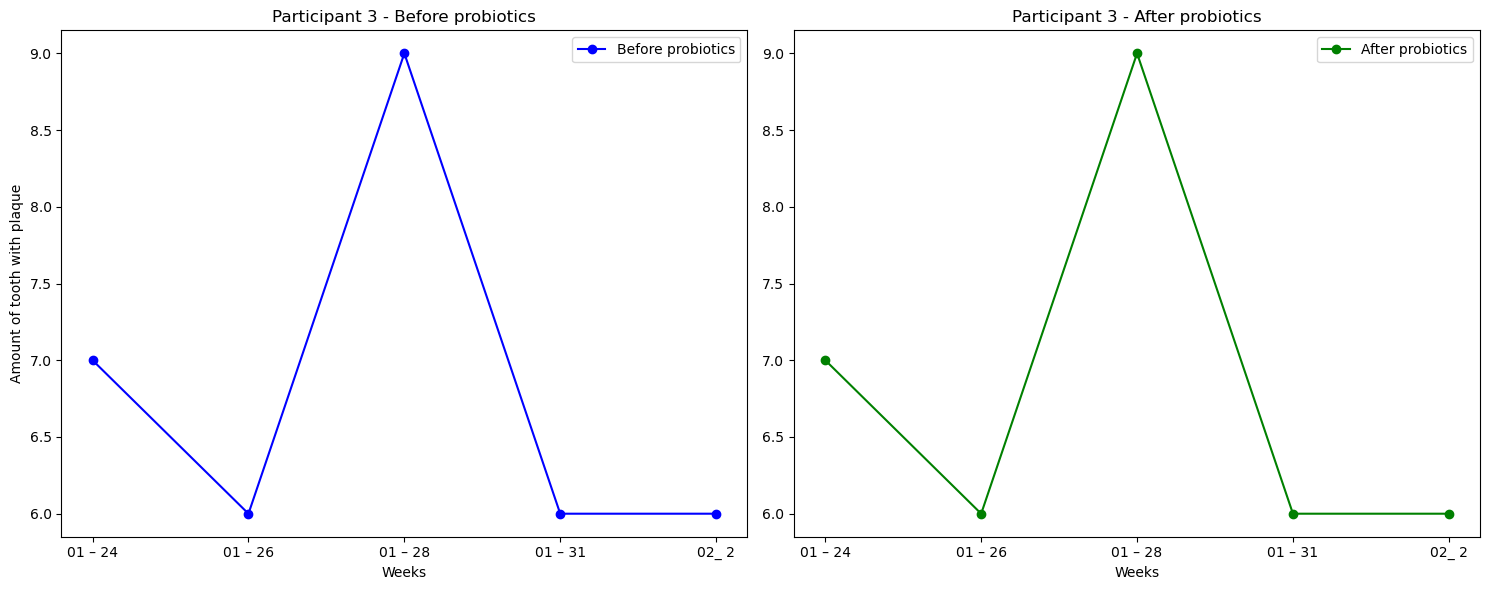

In [35]:
# Cleanup and preparation
df_before_plaque_cleaned = df_before_plaque.dropna()
df_after_plaque_cleaned = df_after_plaque.dropna()

df_before_plaque_sorted = df_before_plaque_cleaned.sort_values(by='Weeks')
df_after_plaque_sorted = df_after_plaque_cleaned.sort_values(by='Weeks')

weeks_before = df_before_plaque_sorted['Weeks']
weeks_after = df_after_plaque_sorted['Weeks']

participants = df_before_plaque_sorted.columns[1:].tolist()

# Function to plot data for selected participant
def render_plot(participant):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    if participant in df_before_plaque_sorted.columns:
        axes[0].plot(weeks_before, df_before_plaque_sorted[participant], marker='o', label='Before probiotics', color='blue')
        axes[0].set_title(f'{participant} - Before probiotics')
        axes[0].set_xlabel('Weeks')
        axes[0].set_ylabel('Amount of tooth with plaque')
        axes[0].legend()
        
    if participant in df_after_plaque_sorted.columns:
        axes[1].plot(weeks_after, df_after_plaque_sorted[participant], marker='o', label='After probiotics', color='green')
        axes[1].set_title(f'{participant} - After probiotics')
        axes[1].set_xlabel('Weeks')
        axes[1].legend()
    
    plt.tight_layout()
    plt.show()

# Create a Dropdown widget for participants
participant_selector = pn.widgets.Select(name='participants', options=participants)


# Widget interaction
interactive_plot= pn.bind(render_plot, participant_selector)


pn.Row(
    pn.WidgetBox(participant_selector),  
    interactive_plot
)

In [10]:
inter_plot = widgets.interactive(render_plot, participant=participant_selector)
inter_plot

interactive(children=(Dropdown(description='Participant:', options=('Participant 1', 'Participant 2', 'Partici…

In [14]:
main_panel = pn.Row(
    pn.Column(inter_plot),
    pn.Column(df_before_plaque_sorted.describe(), df_after_plaque_sorted.describe())
)

dashboard = pn.template.BootstrapTemplate(title='dashboard', sidebar_width=200)
dashboard.sidebar.append(inter_plot[0])
dashboard.main.append(main_panel)
dashboard.show()

TypeError: 'interactive' object is not subscriptable